# Geospatial analysis and representation for data science project

### Import libraries

In [1]:
import zipfile, io
import urllib
import os
from matplotlib import pyplot as plt  #to avoid the warning message by plotting the geometries
import warnings
warnings.simplefilter("ignore")

In [2]:
import os
try:
  import geopandas as gpd
except ModuleNotFoundError as e:
  !pip install geopandas==0.10.0
  import geopandas as gpd
if gpd.__version__ != "0.10.0":
  !pip install -U geopandas==0.10.0
  import geopandas as gpd

In [3]:
!pip install cryptography==36.0.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import requests
import urllib3
import ssl
import shutil

class CustomHttpAdapter(requests.adapters.HTTPAdapter):
  # "Transport adapter" that allows us to use custom ssl_context.
  def __init__(self, ssl_context=None, **kwargs):
    self.ssl_context = ssl_context
    super().__init__(**kwargs)

  def init_poolmanager(self, connections, maxsize, block=False):
    self.poolmanager = urllib3.poolmanager.PoolManager(num_pools=connections, maxsize=maxsize, block=block, ssl_context=self.ssl_context)

def get_legacy_session():
  ctx = ssl.create_default_context(ssl.Purpose.SERVER_AUTH)
  ctx.options |= 0x4  # OP_LEGACY_SERVER_CONNECT
  session = requests.session()
  session.mount('https://', CustomHttpAdapter(ctx))
  return session

def download_file(url):
# source: https://stackoverflow.com/a/33488338
  local_filename = url.split('/')[-1]
  with get_legacy_session() as s:
    r = s.get(url, stream=True)
    r.raw.decode_content = True
    with open(local_filename, 'wb') as f:
      shutil.copyfileobj(r.raw, f)
  return local_filename

In [5]:
try:
  import mapclassify 
except ModuleNotFoundError as e:
  !pip install mapclassify==2.4.3
  import mapclassify
if mapclassify.__version__ != "2.4.3":
  !pip install mapclassify==2.4.3
  import mapclassify 

In [6]:
import pandas as pd

In [7]:
import seaborn as sns

In [8]:
try:
  import pygeos
except ModuleNotFoundError as e:
  !pip install pygeos==0.10.2
  import pygeos

In [9]:
try:
  import pyrosm
except ModuleNotFoundError as e:
  !pip install pyrosm==0.6.1
  import pyrosm

In [10]:
try:
  import contextily 
except ModuleNotFoundError as e:
  !pip install contextily
  import contextily
import contextily as ctx

### Import df

##### Provinces salary

In [11]:
os.chdir("/content/")
z = zipfile.ZipFile("provinces_salary_df.zip")
z.extractall()

In [12]:
os.chdir('provinces_salary_df')
prov = gpd.read_file('provinces_salary_df.shp')

##### Literacy

In [13]:
os.chdir('/content/')
l = zipfile.ZipFile("literacy_df.zip")
l.extractall()

In [14]:
os.chdir('literacy_df')
lit = gpd.read_file('literacy_df.shp')

##### Numeracy

In [15]:
os.chdir('/content/')
l = zipfile.ZipFile("numeracy_df.zip")
l.extractall()

In [16]:
os.chdir('numeracy_df')
num = gpd.read_file('numeracy_df.shp')

### Plots

### Health

#### Road mortality

In [ ]:
os.chdir('/content/')
osm = pyrosm.OSM("029_Rovigo_poly-2022-05-18T02Z.osm.pbf") 

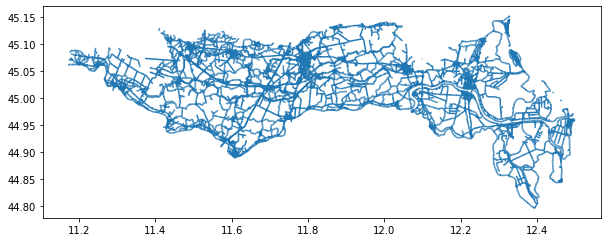

In [ ]:
drive_net = osm.get_network(network_type="driving")
drive_net.plot(figsize=(10,10))
plt.show()

In [ ]:
os.chdir('/content')
accidents_RO=pd.read_csv('DCIS_INCIDMORFER_COM_29122022174353847.csv')
accidents_RO = accidents_RO[accidents_RO["Data type"] == "killed and injured"]

In [ ]:
coords_RO=pd.read_csv('Coord_RO.csv', ";")

In [ ]:
coords_RO.rename(columns={"denominazione": "Territory"}, inplace=True)

In [ ]:
accidents_RO = accidents_RO.merge(coords_RO, on='Territory')
#accidents_RO

In [ ]:
deaths = accidents_RO[accidents_RO["Result"] == "killed"]
deaths["Value"] = pd.to_numeric(deaths["Value"])
injuries = accidents_RO[accidents_RO["Result"] == "injured"]
injuries["Value"] = pd.to_numeric(injuries["Value"])

In [ ]:
deaths.sort_values(by=['Value'], ascending=False)

ITTER107                 Territory TIPO_DATO22           Data type ESITO  \
0      29041                    Rovigo     KILLINJ  killed and injured     M   
8      29004            Badia Polesine     KILLINJ  killed and injured     M   
78     29040                  Rosolina     KILLINJ  killed and injured     M   
30     29015                 Ceregnano     KILLINJ  killed and injured     M   
6      29003            Arquà Polesine     KILLINJ  killed and injured     M   
4      29002       Ariano nel Polesine     KILLINJ  killed and injured     M   
56     29030                     Loreo     KILLINJ  killed and injured     M   
54     29029                 Lendinara     KILLINJ  killed and injured     M   
2      29001                     Adria     KILLINJ  killed and injured     M   
42     29023      Frassinelle Polesine     KILLINJ  killed and injured     M   
40     29022         Fiesso Umbertiano     KILLINJ  killed and injured     M   
76     29052                Porto Viro     KILLINJ  killed and injured     M   
22     29011           Castelguglielmo     KILLINJ  killed and injured     M   
86     29045                   Stienta     KILLINJ  killed and injured     M   
84     29044    San Martino di Venezze     KILLINJ  killed and injured     M   
70     29037                 Polesella     KILLINJ  killed and injured     M   
94     29049              Villamarzana     KILLINJ  killed and injured     M   
92     29048                 Villadose     KILLINJ  killed and injured     M   
64     29034                   Papozze     KILLINJ  killed and injured     M   
90     29047                  Trecenta     KILLINJ  killed and injured     M   
66     29035        Pettorazza Grimani     KILLINJ  killed and injured     M   
68     29036                   Pincara     KILLINJ  killed and injured     M   
88     29046              Taglio di Po     KILLINJ  killed and injured     M   
82     29043               San Bellino     KILLINJ  killed and injured     M   
72     29038       Pontecchio Polesine     KILLINJ  killed and injured     M   
74     29039               Porto Tolle     KILLINJ  killed and injured     M   
96     29050      Villanova del Ghebbo     KILLINJ  killed and injured     M   
60     29032                    Melara     KILLINJ  killed and injured     M   
80     29042                    Salara     KILLINJ  killed and injured     M   
62     29033               Occhiobello     KILLINJ  killed and injured     M   
50     29027  Giacciano con Baruchella     KILLINJ  killed and injured     M   
58     29031                     Lusia     KILLINJ  killed and injured     M   
26     29013        Castelnovo Bariano     KILLINJ  killed and injured     M   
10     29005             Bagnolo di Po     KILLINJ  killed and injured     M   
12     29006                Bergantino     KILLINJ  killed and injured     M   
14     29007                    Bosaro     KILLINJ  killed and injured     M   
16     29008                     Calto     KILLINJ  killed and injured     M   
18     29009                    Canaro     KILLINJ  killed and injured     M   
20     29010                     Canda     KILLINJ  killed and injured     M   
24     29012               Castelmassa     KILLINJ  killed and injured     M   
28     29014                 Ceneselli     KILLINJ  killed and injured     M   
52     29028             Guarda Veneta     KILLINJ  killed and injured     M   
32     29017                   Corbola     KILLINJ  killed and injured     M   
34     29018           Costa di Rovigo     KILLINJ  killed and injured     M   
36     29019                  Crespino     KILLINJ  killed and injured     M   
38     29021                  Ficarolo     KILLINJ  killed and injured     M   
44     29024           Fratta Polesine     KILLINJ  killed and injured     M   
46     29025                     Gaiba     KILLINJ  killed and injured     M   
48     29026                   Gavello     KILLINJ  killed and injured     M   
98  

In [ ]:
injuries.sort_values(by=['Value'], ascending=False)

ITTER107                 Territory TIPO_DATO22           Data type ESITO  \
1      29041                    Rovigo     KILLINJ  killed and injured     F   
3      29001                     Adria     KILLINJ  killed and injured     F   
63     29033               Occhiobello     KILLINJ  killed and injured     F   
77     29052                Porto Viro     KILLINJ  killed and injured     F   
55     29029                 Lendinara     KILLINJ  killed and injured     F   
89     29046              Taglio di Po     KILLINJ  killed and injured     F   
83     29043               San Bellino     KILLINJ  killed and injured     F   
75     29039               Porto Tolle     KILLINJ  killed and injured     F   
61     29032                    Melara     KILLINJ  killed and injured     F   
5      29002       Ariano nel Polesine     KILLINJ  killed and injured     F   
9      29004            Badia Polesine     KILLINJ  killed and injured     F   
79     29040                  Rosolina     KILLINJ  killed and injured     F   
85     29044    San Martino di Venezze     KILLINJ  killed and injured     F   
87     29045                   Stienta     KILLINJ  killed and injured     F   
27     29013        Castelnovo Bariano     KILLINJ  killed and injured     F   
39     29021                  Ficarolo     KILLINJ  killed and injured     F   
45     29024           Fratta Polesine     KILLINJ  killed and injured     F   
7      29003            Arquà Polesine     KILLINJ  killed and injured     F   
95     29049              Villamarzana     KILLINJ  killed and injured     F   
71     29037                 Polesella     KILLINJ  killed and injured     F   
35     29018           Costa di Rovigo     KILLINJ  killed and injured     F   
97     29050      Villanova del Ghebbo     KILLINJ  killed and injured     F   
41     29022         Fiesso Umbertiano     KILLINJ  killed and injured     F   
93     29048                 Villadose     KILLINJ  killed and injured     F   
13     29006                Bergantino     KILLINJ  killed and injured     F   
25     29012               Castelmassa     KILLINJ  killed and injured     F   
91     29047                  Trecenta     KILLINJ  killed and injured     F   
19     29009                    Canaro     KILLINJ  killed and injured     F   
57     29030                     Loreo     KILLINJ  killed and injured     F   
51     29027  Giacciano con Baruchella     KILLINJ  killed and injured     F   
43     29023      Frassinelle Polesine     KILLINJ  killed and injured     F   
37     29019                  Crespino     KILLINJ  killed and injured     F   
21     29010                     Canda     KILLINJ  killed and injured     F   
53     29028             Guarda Veneta     KILLINJ  killed and injured     F   
23     29011           Castelguglielmo     KILLINJ  killed and injured     F   
31     29015                 Ceregnano     KILLINJ  killed and injured     F   
29     29014                 Ceneselli     KILLINJ  killed and injured     F   
69     29036                   Pincara     KILLINJ  killed and injured     F   
59     29031                     Lusia     KILLINJ  killed and injured     F   
65     29034                   Papozze     KILLINJ  killed and injured     F   
11     29005             Bagnolo di Po     KILLINJ  killed and injured     F   
15     29007                    Bosaro     KILLINJ  killed and injured     F   
17     29008                     Calto     KILLINJ  killed and injured     F   
81     29042                    Salara     KILLINJ  killed and injured     F   
33     29017                   Corbola     KILLINJ  killed and injured     F   
73     29038       Pontecchio Polesine     KILLINJ  killed and injured     F   
49     29026                   Gavello     KILLINJ  killed and injured     F   
67     29035        Pettorazza Grimani     KILLINJ  killed and injured     F   
47     29025                     Gaiba     KILLINJ  killed and injured     F   
99  

In [ ]:
deaths_geo = gpd.GeoDataFrame(
    deaths,
    crs='EPSG:4326',
    geometry=gpd.points_from_xy(deaths.longitudine, deaths.latitudine))

injuries_geo = gpd.GeoDataFrame(
    injuries,
    crs='EPSG:4326',
    geometry=gpd.points_from_xy(injuries.longitudine, injuries.latitudine))

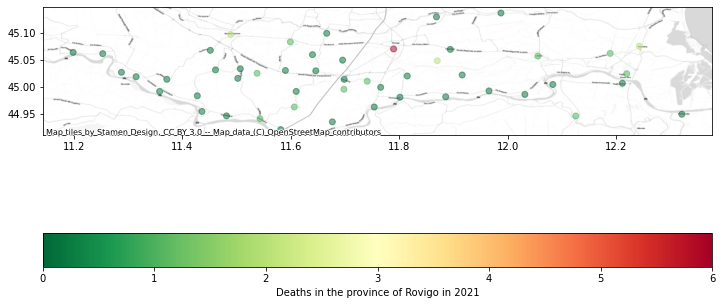

In [ ]:
ax = deaths_geo.plot(deaths_geo["Value"], cmap = "RdYlGn_r", alpha=0.5, figsize=(12, 12), 
                     legend=True,legend_kwds={'label': "Deaths in the province of Rovigo in 2021",
                                              'orientation': "horizontal"})
ctx.add_basemap(ax,crs=deaths_geo.crs.to_string(),
               source=ctx.providers.Stamen.TonerLite)

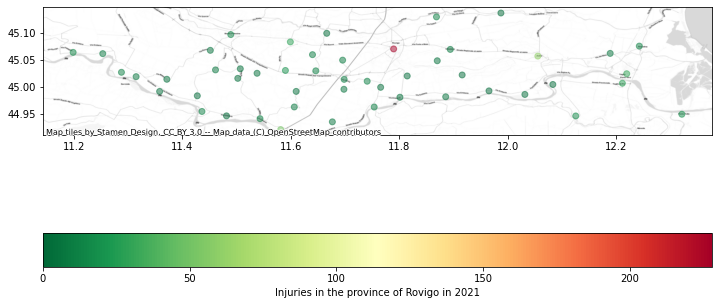

In [ ]:
ax2 = injuries_geo.plot(injuries_geo["Value"], alpha=0.5, cmap="RdYlGn_r", figsize=(12, 12),
                        legend=True, legend_kwds={'label': "Injuries in the province of Rovigo in 2021",
                                                  'orientation': "horizontal"})
ctx.add_basemap(ax2,crs=injuries_geo.crs.to_string(),
               source=ctx.providers.Stamen.TonerLite)

#### Avoidable mortality

In [ ]:
hospitals_campania = gpd.read_file('hospitals_campania.geojson')

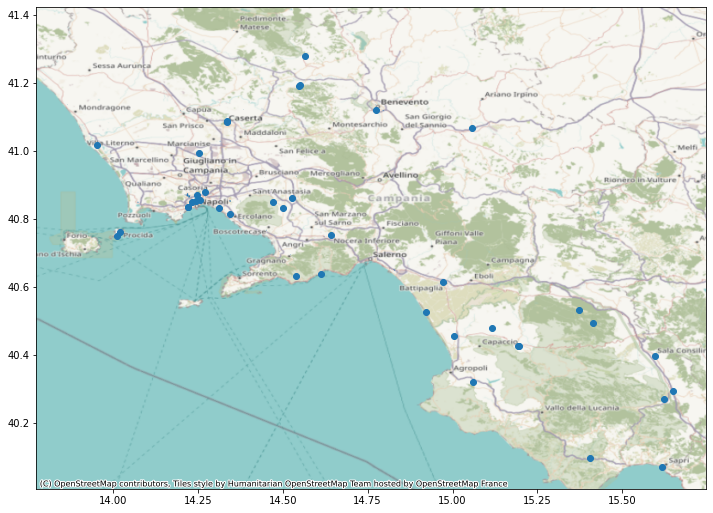

In [ ]:
h_campania = hospitals_campania.plot(figsize=(12, 12))
ctx.add_basemap(h_campania,crs=hospitals_campania.crs.to_string(),
               source=ctx.providers.OpenStreetMap.HOT)

In [ ]:
hospitals_lazio = gpd.read_file('hospitals_lazio.geojson')

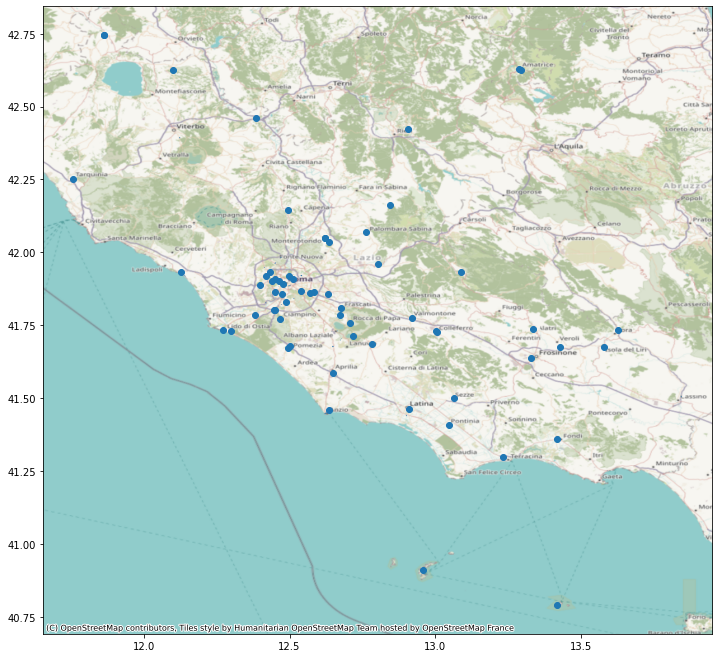

In [ ]:
h_lazio = hospitals_lazio.plot(figsize=(12, 12))
ctx.add_basemap(h_lazio,crs=hospitals_lazio.crs.to_string(),
               source=ctx.providers.OpenStreetMap.HOT)

### Economic well-being

#### Average salary 

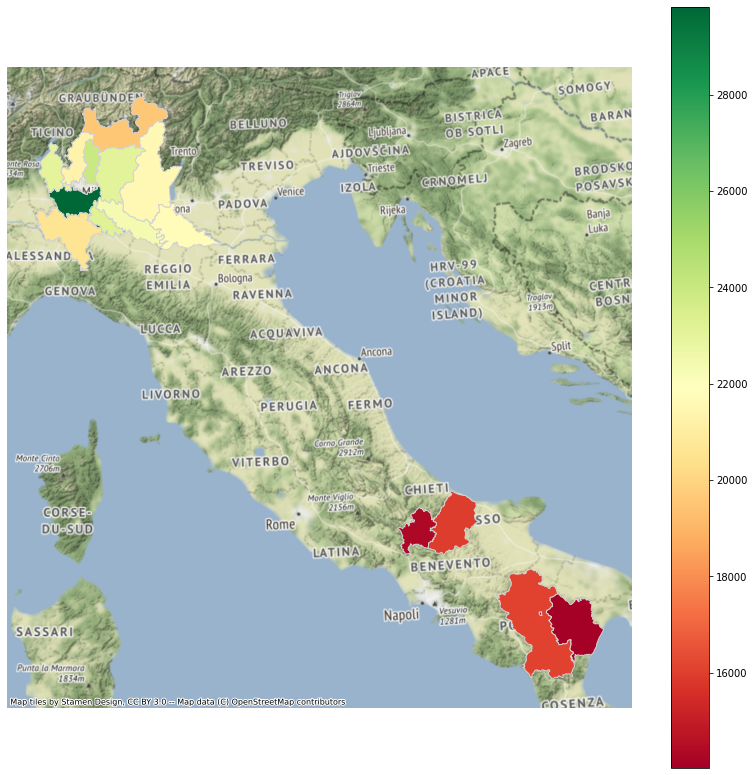

In [ ]:
ax = prov.plot(column='V2021',
               legend=True,
               figsize=(14,14),
               edgecolor="lightgray", 
               cmap="RdYlGn")
ax.set_axis_off()
ctx.add_basemap(ax, crs=prov.crs.to_string())
plt.show()

### Education and training

#### Literacy rate

In [ ]:
lit_fem = lit[lit["SESSO"] == "Females"]
lit_mal = lit[lit["SESSO"] == "Males"]

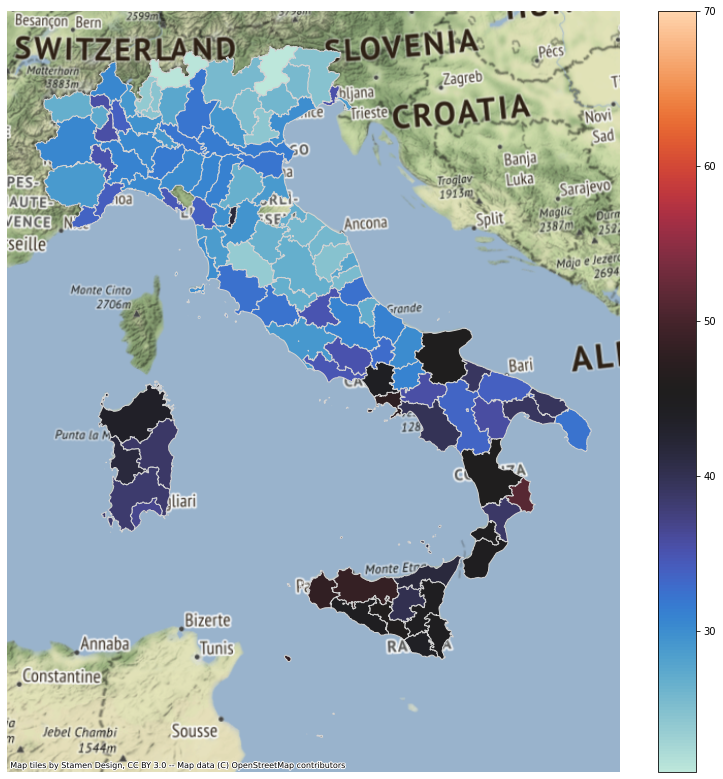

In [ ]:
ax = lit_fem.plot(column='V2021',
               legend=True,
               vmax = 70,
               figsize=(14,14),
               edgecolor="lightgray", 
               cmap="icefire")
ax.set_axis_off()
ctx.add_basemap(ax, crs=lit.crs.to_string())
plt.show()

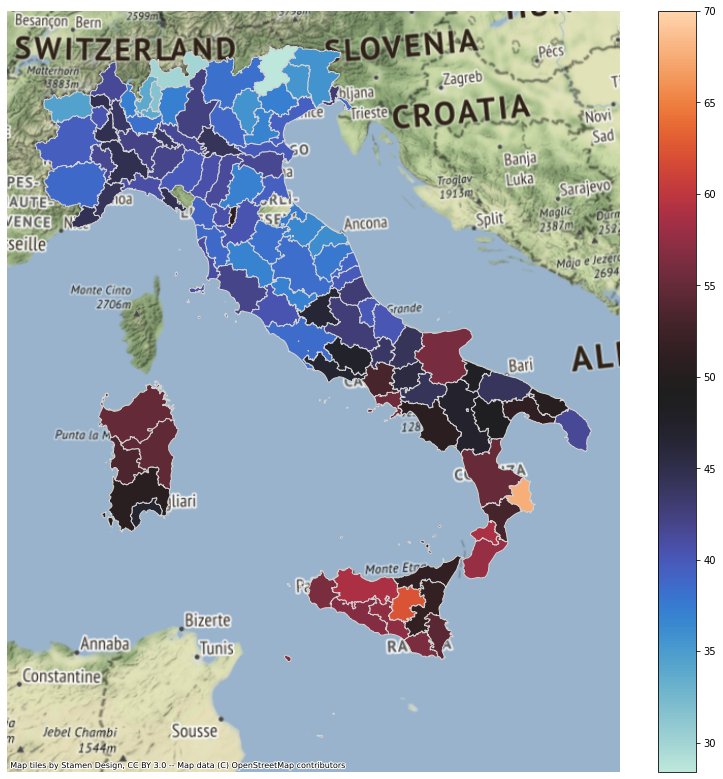

In [ ]:
ax = lit_mal.plot(column='V2021',
               legend=True,
               vmax = 70,
               figsize=(14,14),
               edgecolor="lightgray", 
               cmap="icefire")
ax.set_axis_off()
ctx.add_basemap(ax, crs=lit.crs.to_string())
plt.show()

#### Numeracy rate

In [ ]:
num_fem = num[num["SESSO"] == "Females"]
num_mal = num[num["SESSO"] == "Males"]

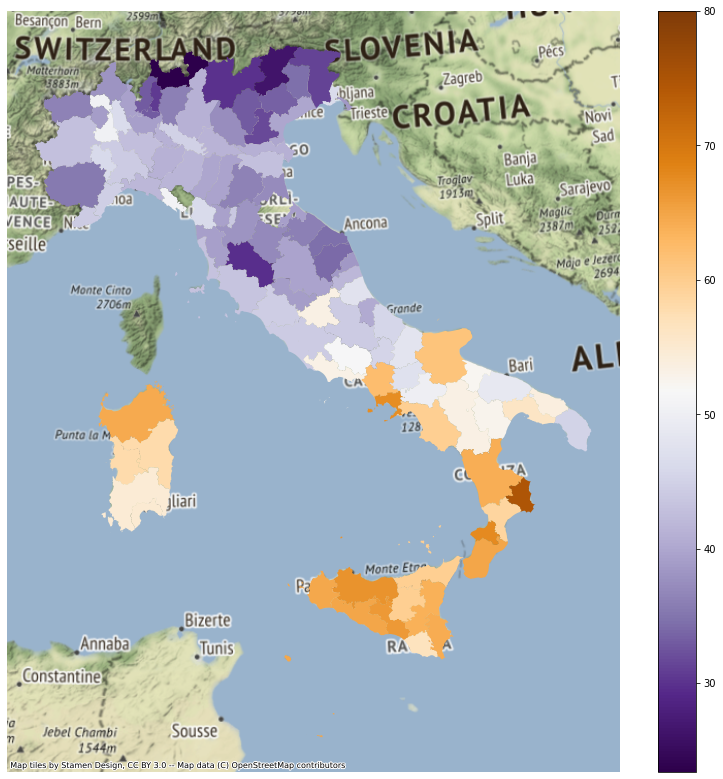

In [ ]:
ax = num_fem.plot(column='V2021',
               legend=True,
               vmax = 80,
               figsize=(14,14),
               edgecolor="",
               cmap = "PuOr_r")
ax.set_axis_off()
ctx.add_basemap(ax, crs=num_fem.crs.to_string())
plt.show()

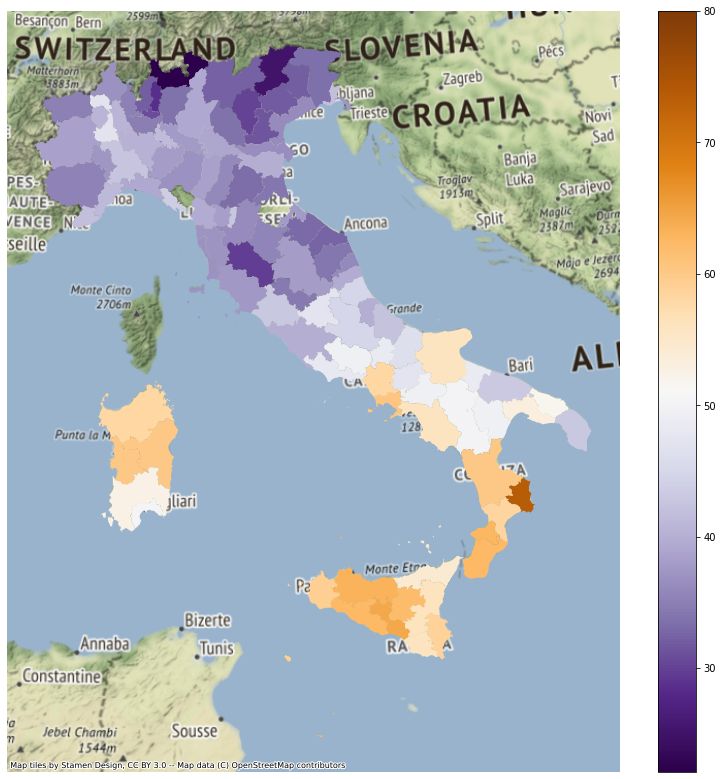

In [ ]:
ax = num_mal.plot(column='V2021',
               legend=True,
               vmax = 80,
               figsize=(14,14),
               edgecolor="",
               cmap = "PuOr_r")
ax.set_axis_off()
ctx.add_basemap(ax, crs=num_mal.crs.to_string())
plt.show()

#### Universities ranking

In [17]:
os.chdir('/content')
uni_rank=pd.read_csv('Uni_avg_points.csv', ";")

In [18]:
uni_rank
top_uni = uni_rank[:15]

In [19]:
top_uni

University  Average points
0               Libera Università di Bolzano           101.0
1              Università di Camerino UNICAM            98.2
2           Università degli Studi di Trento            97.3
3               Università di Milano Bocconi            96.2
4                   Università di Roma LUISS            94.2
5            Università degli Studi di Siena            94.0
6          Università degli Studi di Perugia            93.3
7   Università degli Studi di Milano Statale            93.3
8          Università degli Studi di Sassari            92.8
9            Università degli Studi di Udine            92.8
10         Università degli Studi di Trieste            92.0
11         Università degli Studi di Bologna            91.8
12         Università degli Studi di Salerno            91.8
13       Università Politecnica delle Marche            91.3
14           Università degli Studi di Pavia            91.2

In [20]:
uni = []
for u in top_uni["University"]:
  uni.append(u)

cols = ['Universities']
universities = gpd.GeoDataFrame(uni,columns=cols)

In [23]:
from geopy.geocoders import arcgis
from geopy.exc import GeocoderTimedOut

geolocator=arcgis.ArcGIS(timeout=None)

In [24]:
universities_geo = gpd.tools.geocode(universities.Universities, provider="arcgis")

In [25]:
tn = "Università di Trento, Provincia autonoma di Trento"
universities_geo.iloc[[2]] = gpd.tools.geocode(tn, provider="arcgis")
universities_geo.iloc[[3]] = gpd.tools.geocode(universities.Universities[3], provider="nominatim")
luiss = "University Luiss Guido Carli, Rome"
universities_geo.iloc[[4]] = gpd.tools.geocode(luiss, provider="nominatim")

In [26]:
universities_geo

geometry  \
0   POINT (11.35383 46.49864)   
1   POINT (13.57346 42.85062)   
2   POINT (11.12326 46.06682)   
3    POINT (9.19041 45.44862)   
4   POINT (12.49354 41.92453)   
5   POINT (11.33277 43.31914)   
6   POINT (12.39830 43.09543)   
7    POINT (9.65304 45.69935)   
8    POINT (8.55743 40.72593)   
9   POINT (13.23273 46.06629)   
10  POINT (12.68004 45.95137)   
11  POINT (12.20047 44.41273)   
12  POINT (14.78241 40.75432)   
13  POINT (13.51567 43.58847)   
14   POINT (9.15586 45.18675)   

                                              address  
0                        Libera Università di Bolzano  
1                              Università di Camerino  
2                                University of Trento  
3   Università Bocconi 1, Via Ferdinando Bocconi, ...  
4   Libera Università Internazionale degli Studi S...  
5                     Università degli Studi di Siena  
6                   Università degli Studi di Perugia  
7                    Università degli Studi di Milano  
8                   Università degli Studi di Sassari  
9                     Università degli Studi di Udine  
10                  Università degli Studi di Trieste  
11                  Università degli Studi di Bologna  
12                  Università degli Studi di Salerno  
13                Università Politecnica delle Marche  
14                    Università degli Studi di Pavia

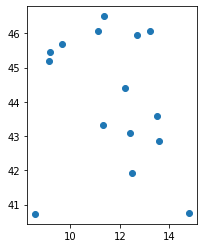

In [27]:
universities_geo.plot()
plt.show()

In [28]:
universities_geo.explore(marker_kwds={"color": "green", "radius": "10"})